In [2]:
from requests import Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd
import os
from time import sleep


def api_runner():
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start': '1',
        'limit': '15',
        'convert': 'USD'
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': 'API_KEY'
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
        return

    # pd.set_option('display.max_columns', None)
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')

    file_path = r'Crypto API.csv'

    if not os.path.isfile(file_path):
        df.to_csv(file_path, index=False)
    else:
        df.to_csv(file_path, mode='a', header=False, index=False)

    print('API Runner completed at', pd.to_datetime('now'))

# Run the function every minute, 333 times
for i in range(333):
    api_runner()
    sleep(60)

print("Data collection finished.")


API Runner completed at 2025-11-12 13:44:24.877984
API Runner completed at 2025-11-12 13:45:25.165152
API Runner completed at 2025-11-12 13:46:28.597765
API Runner completed at 2025-11-12 13:47:28.839879
API Runner completed at 2025-11-12 13:48:29.143514


KeyboardInterrupt: 

In [3]:
df = pd.read_csv(r'Crypto API.csv')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12473,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.994773e+07,1.994773e+07,...,59.3043,2.203498e+12,NaN,2025-11-12T12:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-12 13:42:46.522242
1,1027,Ethereum,ETH,ethereum,11138,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.206965e+08,1.206965e+08,...,12.1343,4.282199e+11,NaN,2025-11-12T12:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-12 13:42:46.522242
2,825,Tether USDt,USDT,tether,157934,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,1.835040e+11,1.869128e+11,...,5.2005,1.869575e+11,NaN,2025-11-12T12:41:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-11-12 13:42:46.522242
3,52,XRP,XRP,xrp,1756,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,6.010720e+10,9.998577e+10,...,4.1600,2.442386e+11,NaN,2025-11-12T12:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-12 13:42:46.522242
4,1839,BNB,BNB,bnb,2953,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",1.377372e+08,1.377372e+08,1.377372e+08,...,3.7926,1.338742e+11,NaN,2025-11-12T12:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-12 13:42:46.522242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,32196,Hyperliquid,HYPE,hyperliquid,196,2024-07-15T10:14:50.000Z,"['decentralized-exchange-dex-token', 'defi', '...",9.995333e+08,3.366852e+08,9.995333e+08,...,0.3843,4.025100e+10,NaN,2025-11-12T12:46:00.000Z,32196.0,Hyperliquid,HYPE,hyperliquid,0x0d01dc56dcaaca66ad901c959b4011ec,2025-11-12 13:48:29.136864
86,1975,Chainlink,LINK,chainlink,2145,2017-09-20T00:00:00.000Z,"['platform', 'cosmos-ecosystem', 'defi', 'inte...",1.000000e+09,6.968500e+08,1.000000e+09,...,0.3172,1.604337e+10,NaN,2025-11-12T12:46:00.000Z,1027.0,Ethereum,ETH,ethereum,0x514910771af9ca656af840dff83e8264ecf986ca,2025-11-12 13:48:29.136864
87,1831,Bitcoin Cash,BCH,bitcoin-cash,1091,2017-07-23T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'marketplace', ...",2.100000e+07,1.995202e+07,1.995202e+07,...,0.2983,1.107869e+10,NaN,2025-11-12T12:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-12 13:48:29.136864
88,512,Stellar,XLM,stellar,781,2014-08-05T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",5.000181e+10,3.211119e+10,5.000179e+10,...,0.2652,1.456794e+10,NaN,2025-11-12T12:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-12 13:48:29.136864


In [4]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [5]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12473,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19947728.00000,19947728.00000,...,59.30430,2203497523524.00000,NaN,2025-11-12T12:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-12 13:42:46.522242
1,1027,Ethereum,ETH,ethereum,11138,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120696490.07469,120696490.07469,...,12.13430,428219909676.77002,NaN,2025-11-12T12:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-12 13:42:46.522242
2,825,Tether USDt,USDT,tether,157934,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,183503961350.79404,186912846205.19083,...,5.20050,186957489427.39001,NaN,2025-11-12T12:41:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-11-12 13:42:46.522242
3,52,XRP,XRP,xrp,1756,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,60107199237.00000,99985774127.00000,...,4.16000,244238552924.35999,NaN,2025-11-12T12:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-12 13:42:46.522242
4,1839,BNB,BNB,bnb,2953,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",137737175.61000,137737175.61000,137737175.61000,...,3.79260,133874238158.99001,NaN,2025-11-12T12:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-12 13:42:46.522242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,32196,Hyperliquid,HYPE,hyperliquid,196,2024-07-15T10:14:50.000Z,"['decentralized-exchange-dex-token', 'defi', '...",999533278.00000,336685219.00000,999533278.00000,...,0.38430,40250996541.56000,NaN,2025-11-12T12:46:00.000Z,32196.00000,Hyperliquid,HYPE,hyperliquid,0x0d01dc56dcaaca66ad901c959b4011ec,2025-11-12 13:48:29.136864
86,1975,Chainlink,LINK,chainlink,2145,2017-09-20T00:00:00.000Z,"['platform', 'cosmos-ecosystem', 'defi', 'inte...",1000000000.00000,696849970.45259,1000000000.00000,...,0.31720,16043366172.97000,NaN,2025-11-12T12:46:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x514910771af9ca656af840dff83e8264ecf986ca,2025-11-12 13:48:29.136864
87,1831,Bitcoin Cash,BCH,bitcoin-cash,1091,2017-07-23T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'marketplace', ...",21000000.00000,19952021.87500,19952021.87500,...,0.29830,11078691827.31000,NaN,2025-11-12T12:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-12 13:48:29.136864
88,512,Stellar,XLM,stellar,781,2014-08-05T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",50001806812.00000,32111185296.28873,50001786883.67146,...,0.26520,14567938550.21000,NaN,2025-11-12T12:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-12 13:48:29.136864


In [6]:
# how much each cryptocurrency’s price has changed on average over the last 1h, 24h, 7d, 30d, 60d, and 90d
df1 = df.groupby('name', sort=False)[[
    'quote.USD.percent_change_1h',
    'quote.USD.percent_change_24h',
    'quote.USD.percent_change_7d',
    'quote.USD.percent_change_30d',
    'quote.USD.percent_change_60d',
    'quote.USD.percent_change_90d'
]].mean()
df1

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.08329,0.09122,2.20882,-8.47148,-9.63879,-12.33840
Ethereum,-0.00535,-0.28666,5.96066,-14.00473,-25.03840,-23.17258
Tether USDt,0.00388,0.00615,-0.00352,-0.08465,-0.03718,-0.02389
XRP,0.37540,-0.62940,8.75291,-5.43409,-23.00731,-21.88010
BNB,0.18247,-0.77734,1.95550,-25.15388,3.37458,14.91417
Solana,-0.26612,-2.39799,0.68784,-17.70223,-34.28619,-19.15842
USDC,0.00165,0.01305,-0.00557,0.00798,0.01924,0.01778
TRON,0.24395,0.73185,4.90429,-6.47857,-14.82433,-16.85540
Dogecoin,-0.01021,-0.53423,7.12322,-14.92811,-40.20630,-22.63024


In [7]:
df2 = df1.stack()
df2

name                                      
Bitcoin       quote.USD.percent_change_1h     0.08329
              quote.USD.percent_change_24h    0.09122
              quote.USD.percent_change_7d     2.20882
              quote.USD.percent_change_30d   -8.47148
              quote.USD.percent_change_60d   -9.63879
                                               ...   
UNUS SED LEO  quote.USD.percent_change_24h    0.20847
              quote.USD.percent_change_7d    -2.86229
              quote.USD.percent_change_30d   -4.31872
              quote.USD.percent_change_60d   -3.67376
              quote.USD.percent_change_90d   -0.43704
Length: 90, dtype: float64

In [8]:
type(df2)

pandas.core.series.Series

In [9]:
# convert series into dataframe
df3 = df2.to_frame(name='values')
df3

values
name                                              
Bitcoin      quote.USD.percent_change_1h   0.08329
             quote.USD.percent_change_24h  0.09122
             quote.USD.percent_change_7d   2.20882
             quote.USD.percent_change_30d -8.47148
             quote.USD.percent_change_60d -9.63879
...                                            ...
UNUS SED LEO quote.USD.percent_change_24h  0.20847
             quote.USD.percent_change_7d  -2.86229
             quote.USD.percent_change_30d -4.31872
             quote.USD.percent_change_60d -3.67376
             quote.USD.percent_change_90d -0.43704

[90 rows x 1 columns]

In [10]:
type(df3)

pandas.core.frame.DataFrame

In [11]:
df3.count()

values    90
dtype: int64

In [12]:
# index reset
df4 = df3.reset_index()
df4

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.08329
1,Bitcoin,quote.USD.percent_change_24h,0.09122
2,Bitcoin,quote.USD.percent_change_7d,2.20882
3,Bitcoin,quote.USD.percent_change_30d,-8.47148
4,Bitcoin,quote.USD.percent_change_60d,-9.63879
...,...,...,...
85,UNUS SED LEO,quote.USD.percent_change_24h,0.20847
86,UNUS SED LEO,quote.USD.percent_change_7d,-2.86229
87,UNUS SED LEO,quote.USD.percent_change_30d,-4.31872
88,UNUS SED LEO,quote.USD.percent_change_60d,-3.67376


In [13]:
df4 = df4.rename(columns={'level_1': 'percent_change'})
df4

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.08329
1,Bitcoin,quote.USD.percent_change_24h,0.09122
2,Bitcoin,quote.USD.percent_change_7d,2.20882
3,Bitcoin,quote.USD.percent_change_30d,-8.47148
4,Bitcoin,quote.USD.percent_change_60d,-9.63879
...,...,...,...
85,UNUS SED LEO,quote.USD.percent_change_24h,0.20847
86,UNUS SED LEO,quote.USD.percent_change_7d,-2.86229
87,UNUS SED LEO,quote.USD.percent_change_30d,-4.31872
88,UNUS SED LEO,quote.USD.percent_change_60d,-3.67376


In [14]:
df4['percent_change'] = df4['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d','quote.USD.percent_change_90d'], ['1h', '24h', '7d', '30d', '60d', '90d'])
df4

,name,percent_change,values
0,Bitcoin,1h,0.08329
1,Bitcoin,24h,0.09122
2,Bitcoin,7d,2.20882
3,Bitcoin,30d,-8.47148
4,Bitcoin,60d,-9.63879
...,...,...,...
85,UNUS SED LEO,24h,0.20847
86,UNUS SED LEO,7d,-2.86229
87,UNUS SED LEO,30d,-4.31872
88,UNUS SED LEO,60d,-3.67376


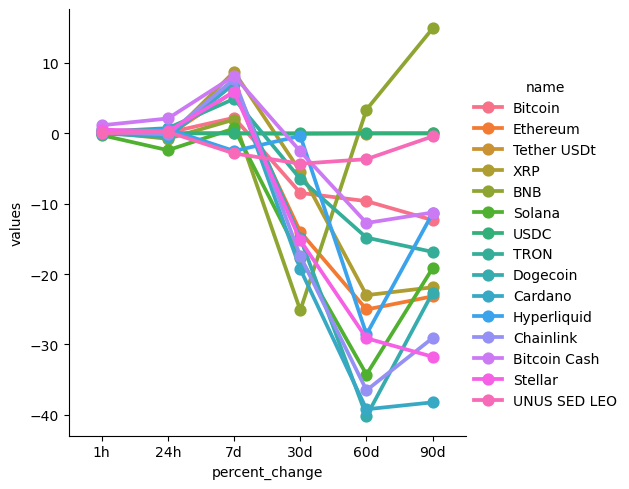

In [15]:
import seaborn as sns
# visualize percentage changes for each cryptocurrency
sns.catplot(x='percent_change', y = 'values', hue='name', data = df4, kind='point')

In [23]:
# Bitcoin's price data over time
df5 = df[['name', 'quote.USD.price', 'timestamp']]
df5 = df5.query("name == 'Bitcoin'")
df5['timestamp'] = pd.to_datetime(df5['timestamp'])
df5['timestamp'] = df5['timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')
df5

,name,quote.USD.price,timestamp
0,Bitcoin,104928.45350,2025-11-12 13:42:46
15,Bitcoin,104851.54801,2025-11-12 13:44:24
30,Bitcoin,104842.24305,2025-11-12 13:45:25
45,Bitcoin,104859.16657,2025-11-12 13:46:28
60,Bitcoin,104879.45506,2025-11-12 13:47:28
75,Bitcoin,104883.05494,2025-11-12 13:48:29


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

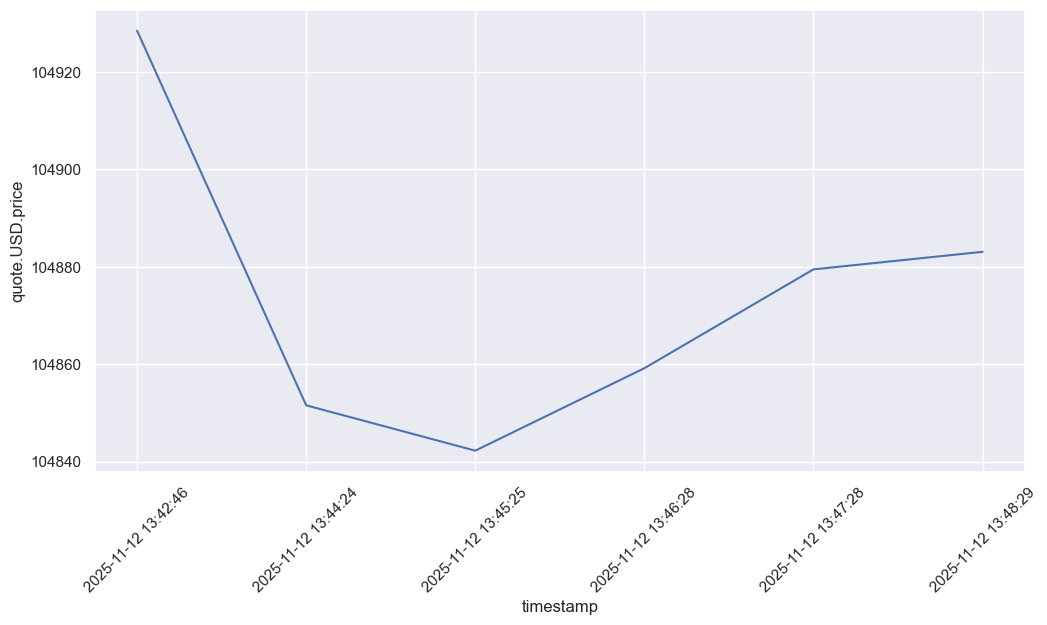

In [24]:
import matplotlib.pyplot as plt
# how the Bitcoin's price changes over time
sns.set_theme(style='darkgrid')
plt.figure(figsize=(12,6))
plt.xticks(rotation=45)  
sns.lineplot(x='timestamp', y = 'quote.USD.price', data=df5)